# J2 – Statistiques

## Satistiques descriptives

### Exercice 1 – Quel pourcentile ? (*)
Dérire cette série de nombres avec un maximum de statistiques descriptives.

_Hint: Utilisez `numpy` et `scipy`_

In [1]:
import numpy as np
import pandas as pd

In [2]:
test_array = np.array([ 29.06114022,  26.17437913,  36.4492889 ,  54.90292031,
        49.44535829,  70.72485829,  67.46168782,  77.42488633,
         5.19166198,  46.1153849 , 102.91120315,  37.63296073,
        38.20406491,  71.23979213,  50.67913182,  71.61930794,
        36.13388738,  27.3738083 ,  80.05990108,  64.42082913,
        85.96083068,  38.48042099,  39.96362245,  62.00757552,
        83.12837179,  50.02396422,  73.35132353,  55.20438011,
        45.0256195 ,  18.21004262,  46.61125507,  29.79881717,
        19.16614263,  36.87047247,  34.71334354,  85.11379842,
        66.79951584,  61.00108181,  46.82147047,   4.4950038 ,
        59.64403006,  17.01467171,  40.00601743,  35.13955427,
        38.31776797,  54.1456781 ,  34.30530359, 103.841159  ,
        83.36621903,  43.18991314,  46.98826925,  66.62157158,
        41.79001612,  40.60759538,  65.20520983,  21.43783658,
        69.52452364,  86.3687045 ,  71.41994957,  47.33225797,
        21.115204  ,  55.05271646,  41.89208457,  55.22620396,
        51.83378269,  46.00827601,  44.26225881,  83.07739312,
        48.96878562,  64.82302883,  25.87666904,  48.55161088,
        48.19525418,  47.60694118,  42.81430297,  15.83639471,
        73.88628351,  59.81470386,  36.10382006,  54.88516162,
        63.63872644,  26.40355033,  81.54731183,  26.72902021,
        73.58336019,  29.31653704,  59.08846558,  47.91728695,
        20.65932672,  67.37507865,  29.69230719,  35.60901864,
        75.98322683,  74.13652542,  42.1707353 ,  36.14038798,
        63.02800873,  39.74962657,  23.85164459,  93.0516192 ])

In [3]:
from scipy import stats

statistics = stats.describe(test_array)
statistics.mean

50.677423945600005

In [4]:
df = pd.DataFrame(data=test_array)

In [5]:
df.describe()

,0
count,100.000000
mean,50.677424
std,21.192488
min,4.495004
25%,36.138763
50%,47.762114
75%,66.666058
max,103.841159


In [6]:
stats.skew(test_array)

0.2419004544946985

In [7]:
print(f"Nombre d'observations : {test_array.shape[0]}")
print(f"Moyenne de l'échantillon : {test_array.mean():.3f}")
print(f"Moyenne de l'échantillon : {np.mean(test_array):.3f}")
print(f"Ecart-type de l'échantillon : {test_array.std():.10f}")
print(f"Mediane de l'échantillon : {np.median(test_array):.3f}")
print(f"Max de l'échantillon : {np.max(test_array):.3f}")

Nombre d'observations : 100
Moyenne de l'échantillon : 50.677
Moyenne de l'échantillon : 50.677
Ecart-type de l'échantillon : 21.0862591103
Mediane de l'échantillon : 47.762
Max de l'échantillon : 103.841


### Exercice 2 - Le football est-il relié à l'économie ? (*)

Trouver le coefficient de correlation entre les valeurs du CAC40 et les prix des actions du Groupe OL 

_Hint: Il existe une fonction de correlation sur `numpy`_

In [8]:
cac_values = np.array([5197.79, 5011.98, 5022.38, 4858.97, 4762.78, 4695.44, 4771.39,
       4688.74, 4606.24, 4539.91, 4444.56, 4445.45, 4496.98, 4458.16,
       4498.34, 4277.63, 4273.13, 4344.95, 4472.5 , 4490.22, 4549.64,
       4501.44, 4433.38, 4483.13])

olg_values = np.array([2.34, 2.41, 2.41, 2.32, 2.27, 2.24, 2.16, 2.1 , 2.07, 2.07, 2.08,
       2.1 , 2.1 , 2.08, 2.08, 2.07, 2.06, 2.08, 2.08, 2.1 , 2.12, 2.15,
       2.14, 2.17])

In [9]:
np.corrcoef(cac_values, olg_values)

array([[1.        , 0.87975468],
       [0.87975468, 1.        ]])

In [10]:
print(f"La corrélation entre le CAC et OLG est de {np.corrcoef(cac_values, olg_values)[0, 1]:.1%}")

La corrélation entre le CAC et OLG est de 88.0%


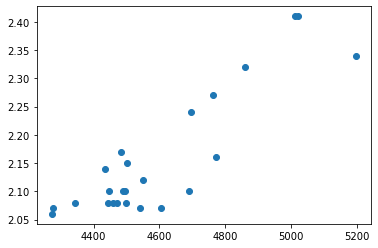

In [11]:
import matplotlib.pyplot as plt 

plt.scatter(cac_values,olg_values)

## Bootstrapping, inference, intervalles de confiance

### Exercise 3 – Old Faithful (***)

Old Faithful  est un geyser du Yellowstone National Park dans le Wyoming: http://en.wikipedia.org/wiki/Old_Faithful.

Le dataset  `old_faithful.csv` donne la durée de 272 eruptions consécutives. La colonne `eruptions` représente la durée des eruptions en minutes, et la colonne `waiting` représente les durée en minutes jusqu'à la prochaine éruption.

On veut estimer la durée **mediane** d'une eruption et donner un interval de confiance de 90% pour la mediane.

**1. Importer les données et convertir la durée des éruptions en secondes.**

In [12]:
import pandas as pd

*Solution 1 : avec un read csv*

In [13]:
# Solution 1
geyser = pd.read_csv('old_faithful.csv', sep='\s+')
geyser['eruptions'], geyser['waiting'] = geyser['eruptions']*60, geyser['waiting']*60
geyser.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'old_faithful.csv'

*Solution 2 : en séparant les données manuellement - avec le paramètre expand de split*

In [14]:
# Solution 2
import pandas as pd
geyser = pd.read_csv('old_faithful.csv')

geyser[['eruptions', 'waiting']] = geyser['eruptions\twaiting'].str.split('\t', expand=True)
geyser['eruptions'], geyser['waiting'] = geyser['eruptions'].astype(float), geyser['waiting'].astype(int)
geyser['eruptions'], geyser['waiting'] = geyser['eruptions']*60, geyser['waiting']*60
geyser = geyser.drop(columns=['eruptions\twaiting'])
geyser.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'old_faithful.csv'

*Solution 3 : en séparant les données manuellement - en utilisant zip*

Faisons un point sur la fonction zip de Python. C'est une fonction très pratique pour manipuler des fonctions appliquées à une colonne pandas produisant 2 colonnes en sortie. C'est un cas de figure qui arrive assez souvent et qui est complexe à gérer !





In [15]:
print('Jean Dupont'.split(' '))
df = pd.DataFrame(['Jean Dupont', 'Emilie Dupont'], columns=['Nom complet'])
df['Prénom'], df['Nom'] = zip(*df['Nom complet'].str.split())
df

['Jean', 'Dupont']


,Nom complet,Prénom,Nom
0,Jean Dupont,Jean,Dupont
1,Emilie Dupont,Emilie,Dupont


zip vient concaténer 2 listes sous forme de tuples. Ces tuples peuvent ensuite être assignés à 2 nouvelles colonnes. 
- On utilise l'astérisque devant df pour dire à zip qu'il doit prendre toutes les listes produites par le str.split() (il y en a 2 dans notre cas) et les assembler sans qu'on les nomme explicitement. 
En effet, on ne stocke pas ces variables qui sont créées temporairement, on ne peut donc pas indiquer leurs noms à zip ! 
- L'astérisque se traduit par "prend tout ce qui arrive quel que soit son nom", ce qui permet de "zipper" les 2 listes.

In [16]:
geyser = pd.read_csv('old_faithful.csv')
geyser["eruptions"], geyser["waiting"] = zip(*geyser['eruptions\twaiting'].str.split('\t'))
geyser = geyser.drop(columns=['eruptions\twaiting'])
geyser["eruptions"], geyser["waiting"] = geyser["eruptions"].astype(float), geyser["waiting"].astype(int)
geyser["eruptions"], geyser["waiting"] = geyser["eruptions"]*60, geyser["waiting"]*60
geyser.head(3)

,eruptions,waiting
0,216.00,4740
1,108.00,3240
2,199.98,4440


In [17]:
geyser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 3.3 KB


**2. Tracer un histogramme de la durée des éruptions.**

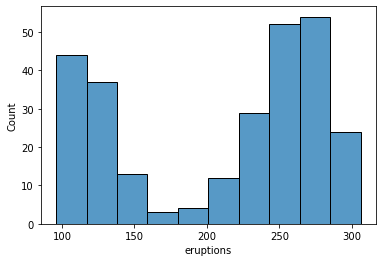

In [18]:
import seaborn as sns
sns.histplot(geyser['eruptions']);

**3. Calculer la mediane de l'échantillon (durée des éruptions).**

In [19]:
sample_median = geyser['eruptions'].median()
sample_median

240.0

In [20]:
geyser['eruptions'].describe()["max"]

306.0

**4. Trouver la médiane d'un échantillon bootstrappé. Répeter l'opération 1000 fois et stocker 1000 médianes bootstrappées.**

In [21]:
vals = geyser['eruptions'].values

In [22]:
geyser['eruptions'].values

array([216.  , 108.  , 199.98, 136.98, 271.98, 172.98, 282.  , 216.  ,
       117.  , 261.  , 109.98, 235.02, 252.  , 105.  , 282.  , 130.02,
       105.  , 288.  ,  96.  , 255.  , 108.  , 105.  , 207.  , 184.02,
       271.98, 216.  , 118.02, 244.98, 231.  , 265.98, 258.  , 268.02,
       202.02, 241.98, 229.98, 121.02, 112.02, 289.98, 109.98, 286.98,
       261.  , 112.98, 274.02, 105.  , 271.98, 199.02, 229.98, 126.  ,
       277.98, 120.  , 288.  , 282.96, 109.98, 289.98, 103.98, 292.98,
       223.02, 100.02, 274.02, 259.02, 133.98, 270.  , 105.  , 288.  ,
       109.02, 264.  , 250.02, 282.  , 124.02, 282.  , 241.98, 118.02,
       270.  , 240.  , 118.98, 304.02, 121.02, 274.02, 232.98, 216.  ,
       247.98, 259.98, 246.  , 157.98, 244.02, 295.98, 237.  , 271.02,
       130.02, 240.  , 132.  , 259.98, 112.02, 289.02, 109.98, 258.  ,
       280.02, 225.  , 112.02, 294.  , 148.98, 262.02, 126.  , 270.  ,
       243.  , 112.02, 282.  , 106.98, 291.  , 220.98, 283.98, 138.  ,
      

In [23]:
# Single bootstrap sample
import numpy as np 
np.median(np.random.choice(vals, replace=True, size=1000))

235.01999999999998

In [24]:
# Multiple bootstraps
bootstrap_medians = []
for i in range(1000):
    temp_sample = np.random.choice(vals, replace=True, size=len(vals))
    temp_median = np.median(temp_sample)
    bootstrap_medians.append(temp_median)
#bootstrap_medians

In [25]:
 len(geyser['eruptions'].values)

272

**5. Tracer un histogramme de la distribution bootstrappée Plot the bootstrap distribution as a histogram.**

_Hint: convertissez l'array en Series pour utiliser `.plot()`._

<AxesSubplot:ylabel='Frequency'>

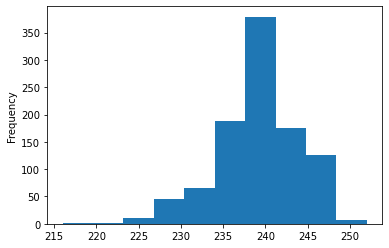

In [26]:
pd.Series(bootstrap_medians).plot(kind='hist')

**6. Trouver les valeurs critiques .95 et .05 (le 5ème et 95ème centile).**

In [27]:
np.percentile(bootstrap_medians, [5,95])

array([229.98, 245.49])

**[BONUS] 7. Ecrire une fonction qui fais l'ensemble de toutes les opérations précédentes.**

_Hint: la fonction doit prendre en entrée l'échantillon, le type d'estimateur ('median', 'mean' suffisent) et ressortir l'intervalle de confiance bootstrappé._

In [28]:
def bootstrap_ci(df, alpha=0.05, estimator='mean', iterations=1000):
    """
    Computes a bootstrapped confidence interval.
    
    Args:
        df: DataFrame
            The sample values as a DataFrame. Input a 1-D DataFrame for the mean
            or for the median, and a 2-D DataFrame for the correlation.
        alpha: float, optional
            The confidence level.
        estimator: str, optional
            The chosen measure - 'mean', 'median' or 'correlation'.
        iterations: int, optional
            The nb of bootstrap samples.
    
    Returns:
        sample_est: float
            The sample estimator.
        bootstrapped_ci: list
            The bootstrapped confidence interval.
    """
    
    # Compute the sample estimator
    array = df.values
    if estimator == 'mean':
        sample_est = np.mean(array)
    elif estimator == 'median':
        sample_est = np.median(array)
    elif estimator == 'correlation':
        sample_est = np.corrcoef(array.T)[0][1]
    else:
        raise ValueError('Only "mean", "median" and "correlation" estimators are supported for now.')
    
    # Compute the bootstrap estimators
    bootstrap_est = []
    for i in range(iterations):
        if estimator == 'mean':
            temp_sample = np.random.choice(array, replace=True, size=len(df))
            temp_est = np.mean(temp_sample)
        elif estimator == 'median':
            temp_sample = np.random.choice(array, replace=True, size=len(df))
            temp_est = np.median(temp_sample)
        elif estimator == 'correlation':
          temp_sample = df.sample(len(df), replace=True)
          temp_est = temp_sample.corr().loc['eruptions', 'waiting']
        bootstrap_est.append(temp_est)
    
    # Compute the confidence interval
    ## Regular method
    bootstrapped_ci = np.percentile(bootstrap_est, [alpha*100/2, 100-(alpha*100)/2])
    
    ## Method corresponding to question 8 ("To go further")
    #bootstrap_differences = bootstrap_est - sample_est
    #centiles = np.percentile(bootstrap_differences, [alpha*100/2, 100-(alpha*100)/2])
    #bootstrapped_ci = (sample_est - centiles[0], sample_est - centiles[1])
    
    return sample_est, sorted([round(x, 2) for x in bootstrapped_ci])

In [29]:
bootstrap_ci(geyser["eruptions"], alpha=0.1, estimator='mean', iterations=1000)

(209.26698529411763, [202.43, 216.12])

In [30]:
bootstrap_ci(geyser["eruptions"], alpha=0.1, estimator='median', iterations=1000)

(240.0, [229.98, 246.0])

In [31]:
bootstrap_ci(geyser[["eruptions", "waiting"]], alpha=0.1, estimator='correlation', iterations=1000)

(0.9008111683218127, [0.89, 0.91])

**[BONUS] 8. Calculer les correlation entre la durée des eruptions et le temps d'attente entre chaque éruption. En suite construire un intervalle de confiance bootstrappé pour le coefficient de correlation.**

In [32]:
# with numpy
corrcoef = np.corrcoef(geyser.values.T)[0][1]
corrcoef

0.9008111683218127

In [33]:
# with pandas
corrcoef = geyser.corr().iloc[0, 1]
corrcoef

0.9008111683218128

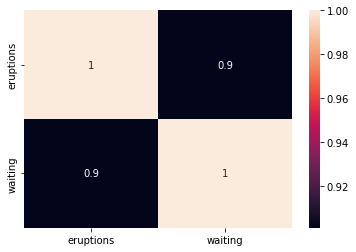

In [34]:
import seaborn as sns
sns.heatmap(geyser.corr(), annot=True);

In [35]:
bootstrap_ci(geyser, alpha=0.05, estimator='correlation', iterations=1000)

(0.9008111683218127, [0.88, 0.92])

**[BONUS] 9. Aller plus loin**
Une autre technique de bootstrap est l'utilisation de la distribution des différence des médianes plutôt que la distribution boostrapée directement
Voir le [MIT course](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf) pour plus de détails.

* Tout d'abord, calculer la différence entre la mediane originale du sample et la médiane bootstrappée.
* En suite, tracer un histogramme de la distribution de ces différences.
* Trouver les valeurs critiques .95 and .05.

>Grâce à la loi des Grands Nombres, ces valeurs représentent une bonne estimation de jusqu'à où la mediane boostrappée peut varié de la mediane de l'échantillon avec 90% de certitude. Le principe du boostrap dis que ces variations devraient apprximer les variations de la médiane de l'échantillon par rapport à la médiane de la population .

* Enfin, utilisez ces valeurs pour construire un bootstrap de 90% d'intervalle de confiance par rapport à la médiane de l'échantillon.

In [36]:
bootstrap_differences = np.array(bootstrap_medians) - sample_median
bootstrap_differences

array([ -1.02,   0.  ,  -3.99,   0.99,   1.98,   4.98,   6.  ,  -3.99,
         0.  ,  -0.99, -10.02,   0.  ,   4.02,  -3.  ,   3.  ,  -3.  ,
        -3.99,  -6.  ,  -6.  ,   1.98,  -3.99,  -5.01,   6.  ,  -3.99,
       -13.98,   1.98,   4.98,   8.49,  -3.99,   0.  ,   0.  ,   9.  ,
         1.98,   4.02,  -0.99,   0.  ,   6.51,  -9.  ,  -1.02,   0.  ,
         1.98, -19.02,   1.98,   0.  ,  -3.51,  -4.98,   0.  ,  -9.51,
        -2.52,   0.  ,  -2.49,  -1.5 ,   4.98,   2.49,  -6.  ,   2.49,
         0.  ,  -2.52,  -3.  ,  -4.98,  -3.99,  -3.99,  -2.01,   4.98,
         4.98,  -4.98,   3.99,   1.98,  -1.98,   1.98,   0.  ,   0.  ,
         2.49,   0.  ,   0.  ,   0.  ,   0.99,  -9.  ,   4.02,   0.  ,
         0.  ,  -2.52,   4.98,   4.98,   4.98,   0.99,  -1.98,   4.98,
        -4.98,  -3.  ,  -3.  ,  -7.02,   0.99,   3.51,  -8.01,  -2.04,
        -0.99,  -4.98,   4.5 ,   0.  ,   0.  ,   0.  ,  -2.01,  -2.52,
        -2.04,   0.  ,   4.98, -10.02,   0.  ,  -2.52,   0.  ,  -4.98,
      

<AxesSubplot:ylabel='Frequency'>

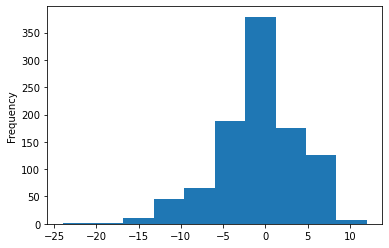

In [37]:
pd.Series(bootstrap_differences).plot(kind='hist')

In [38]:
centiles = np.percentile(bootstrap_differences, [0.05, 0.95])
centiles

array([-24.      , -14.749845])

In [39]:
bootstrapped_ci = np.sort((sample_median - centiles[0], sample_median - centiles[1]))
bootstrapped_ci

array([254.749845, 264.      ])

**[BONUS] 10. Quelle est la probabilité que la médiant d'un échantillon soit strictement plus que 10 secondes plus loin que la vraie médiane.**

_Hint:  Il faut obtenir la valeur absolue des differences du bootstrape, les classer par ordre croissant et en suite calculer la proportion de celles qui sont >10. Grâce à la loi des Grands Nombres, cela donne le pourcentage de chance que les médianes bootstrappées aient un écart strictement plus grands que 10 secondes de la médiane de l'échantillon. Le principe du bootstrape est une bonne approximation de la variation entre la médiane de l'échantillon et la médiane réelle._

In [40]:
sorted_differences = np.array(sorted(np.abs(bootstrap_differences)))
sorted_differences

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,

In [41]:
len(sorted_differences[sorted_differences > 10]) / len(sorted_differences)

0.061

### Exercice 4 – Coûts d'assurance médicale (***)

Data from: https://www.kaggle.com/mirichoi0218/insurance.

**1. Importer les données et convertir la colonne `smoker` avec des valeurs binaires.**

In [42]:
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
insurance['smoker'] = insurance['smoker'].apply(lambda x: 1 if x=='yes' else 0)
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


**2. Grouper les données par sexe & catégories d'âge (18-35, 36-60, >60). L'aggrégation que l'on cherche est une moyenne.**

_Hint: il existe pleins de méthodes possible, une d'entre elles est d'ajouter une variable catégorique grâce à  `.apply()` avant de grouper dessus._

In [44]:
def categorize(val):
    if val <= 35:
        cat = '18-35'
    elif (val > 35) & (val <= 60):
        cat = '36-60'
    else:
        cat = '>60'
    return cat

In [45]:
insurance['group'] = insurance['age'].apply(categorize)
insurance

,age,sex,bmi,children,smoker,region,charges,group
0,19,female,27.900,0,1,southwest,16884.92400,18-35
1,18,male,33.770,1,0,southeast,1725.55230,18-35
2,28,male,33.000,3,0,southeast,4449.46200,18-35
3,33,male,22.705,0,0,northwest,21984.47061,18-35
4,32,male,28.880,0,0,northwest,3866.85520,18-35
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,36-60
1334,18,female,31.920,0,0,northeast,2205.98080,18-35
1335,18,female,36.850,0,0,southeast,1629.83350,18-35
1336,21,female,25.800,0,0,southwest,2007.94500,18-35


In [46]:
# méthode simple
insurance.groupby(['sex', 'group']).mean()

# autre méthode pour trouver aussi le compte.
insurance_gp = insurance.groupby(['sex','group']).agg({'age': ['mean', 'count'],
                                            'bmi':'mean', 
                                            'children':'mean',
                                            'smoker':'mean',
                                            'charges':'mean'})
insurance_gp.columns = ['age', 'count', 'bmi', 'children', 'smoker', 'charges']
insurance_gp

age  count        bmi  children    smoker       charges
sex    group                                                               
female 18-35  25.280576    278  29.776763  0.899281  0.179856   9048.206973
       36-60  48.032641    337  30.672122  1.272997  0.157270  14286.243425
       >60    62.468085     47  31.821809  0.680851  0.255319  21089.268552
male   18-35  25.179054    296  30.422736  1.033784  0.239865  10398.408767
       36-60  47.931548    336  31.118586  1.250000  0.232143  16164.531410
       >60    62.500000     44  33.104091  0.636364  0.227273  21035.278347

**3. Faire la même chose pour le sexe et la colonne fumeurs.**

In [47]:
insurance_gp = insurance.groupby(['sex','smoker']).agg({'bmi':['mean', 'count'], 
                                            'children':'mean',
                                            'charges':'mean'})
insurance_gp.columns = ['bmi', 'count', 'children', 'charges']
insurance_gp

bmi  count  children       charges
sex    smoker                                          
female 0       30.539525    547  1.087751   8762.297300
       1       29.608261    115  1.008696  30678.996276
male   0       30.770580    517  1.092843   8087.204731
       1       31.504182    159  1.188679  33042.005975

**4. Tracer un line plot de la moyenne de `bmi` par age, pour les hommes et les femmes (tous les âges sur l'axe x, moyenne bmi pour les hommes et les femmes sur l'axe y).**

_Hint: vous aurez peut-être besoin de faire un groupby et en suite un `.pivot()` (ce n'est pas la seule méthode)._

In [48]:
insurance

,age,sex,bmi,children,smoker,region,charges,group
0,19,female,27.900,0,1,southwest,16884.92400,18-35
1,18,male,33.770,1,0,southeast,1725.55230,18-35
2,28,male,33.000,3,0,southeast,4449.46200,18-35
3,33,male,22.705,0,0,northwest,21984.47061,18-35
4,32,male,28.880,0,0,northwest,3866.85520,18-35
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,36-60
1334,18,female,31.920,0,0,northeast,2205.98080,18-35
1335,18,female,36.850,0,0,southeast,1629.83350,18-35
1336,21,female,25.800,0,0,southwest,2007.94500,18-35


In [49]:
insurance_age = insurance.groupby(['age', 'sex']).mean()['bmi'].reset_index()
#
# insurance_age.head()

In [50]:
insurance_age = insurance_age.pivot(index='age', columns='sex', values='bmi').reset_index()
# insurance_age = insurance_age.rename(index={'sex':''})
insurance_age

sex,age,female,male
0,18,32.930909,29.855139
1,19,29.051667,28.168143
2,20,29.421429,31.763333
3,21,27.944615,28.394667
4,22,28.859231,33.019000
5,23,31.887143,31.021786
6,24,28.200357,30.085000
7,25,30.086538,29.353667
8,26,28.901538,29.886000
9,27,27.401786,31.265357


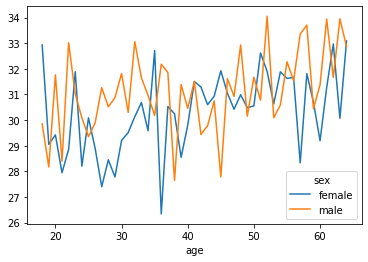

In [51]:
insurance_age.plot(x='age');

**5. Calculer la correlation entre les variables numériques et tracer une heatmap de toutes ces valeurs. Commentez**

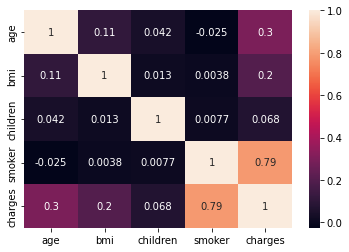

In [52]:
import seaborn as sns
sns.heatmap(insurance.corr(), annot=True);

**6. Tracer deux boxplots: smokers' charges vs. non-smokers' charges.**

_Hint: si vous utilisez seaborn, essayez l'argument `kind='violin'`!_

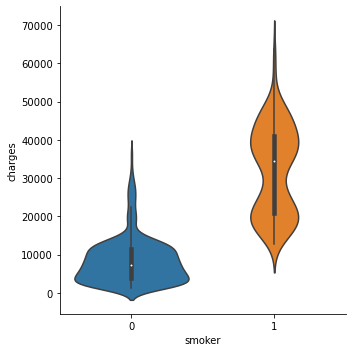

In [53]:
smokers = insurance[['smoker', 'charges']]
sns.catplot(data=smokers, x='smoker', y='charges', kind='violin');

**7. Extraire les valeurs de `charges` pour les groupes de fumeurs et de non-fumeurs en deux listes.**

In [54]:
smokers = insurance[insurance['smoker'] == 1]['charges']
non_smokers = insurance[insurance['smoker'] == 0]['charges']

**[BONUS] 8. Calculer un intervalle de confiance 95% bootstrappé pour la moyenne de chaque groupe.**

_Hint: vous pouvez utiliser la fonction créée dans l'exercice précédent (bonus question n°6)._

In [55]:
print(bootstrap_ci(smokers, alpha=0.05, estimator='mean', iterations=1000))
print(bootstrap_ci(non_smokers, alpha=0.05, estimator='mean', iterations=1000))

(32050.23183153284, [30693.19, 33424.64])
(8434.268297856204, [8083.7, 8793.87])


### Exercise 5 – Airbnb à New York (***)

Data from: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data.

**1. Importer les données.**

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np


In [57]:
df_airbnb = pd.read_csv('AB_NYC_2019.csv')

In [58]:
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


**2. Faire un boxplot du `price`. En suite, retirer tous les outliers du dataset qui sont > 90% , et refaire un boxplot.**

_Hint: `np.percentile`_

In [59]:
percentile_value = np.percentile(df_airbnb['price'], 90)
percentile_value

269.0

In [60]:
df_airbnb['price'].describe(percentiles=[0.25, 0.75, 0.90, 0.95, 0.99])

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
90%        269.000000
95%        355.000000
99%        799.000000
max      10000.000000
Name: price, dtype: float64

In [61]:
df_airbnb_filtered = df_airbnb[(df_airbnb['price']<percentile_value)]

<AxesSubplot:xlabel='price'>

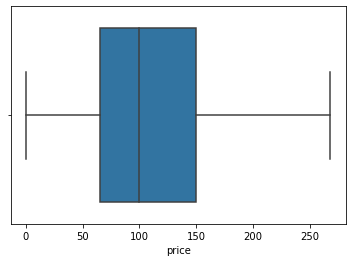

In [62]:
sns.boxplot(data=df_airbnb_filtered, x='price')

**[BONUS] 3. Faites les analyses que vous souhaitez!**

In [63]:
df_airbnb_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43984 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43984 non-null  int64  
 1   name                            43970 non-null  object 
 2   host_id                         43984 non-null  int64  
 3   host_name                       43964 non-null  object 
 4   neighbourhood_group             43984 non-null  object 
 5   neighbourhood                   43984 non-null  object 
 6   latitude                        43984 non-null  float64
 7   longitude                       43984 non-null  float64
 8   room_type                       43984 non-null  object 
 9   price                           43984 non-null  int64  
 10  minimum_nights                  43984 non-null  int64  
 11  number_of_reviews               43984 non-null  int64  
 12  last_review                     

In [64]:
df_airbnb_filtered['has_reviews'] = ~df_airbnb_filtered['last_review'].isna()

C:\Users\antoi\AppData\Local\Temp/ipykernel_22804/3179642567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_filtered['has_reviews'] = ~df_airbnb_filtered['last_review'].isna()


<AxesSubplot:>

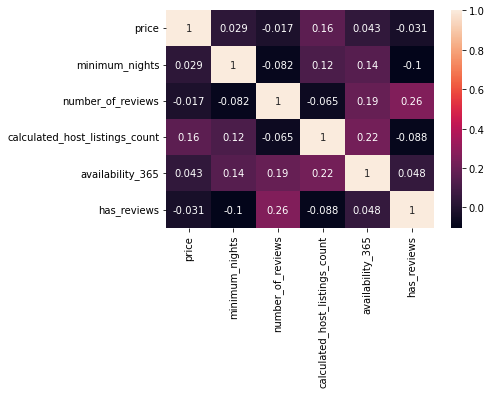

In [65]:
cols_to_remove = ['id', 'host_id', 'latitude', 'longitude', 'reviews_per_month']
df_corr = df_airbnb_filtered.drop(columns=cols_to_remove)
corr_matrix = df_corr.corr()
sns.heatmap(data=corr_matrix, annot=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

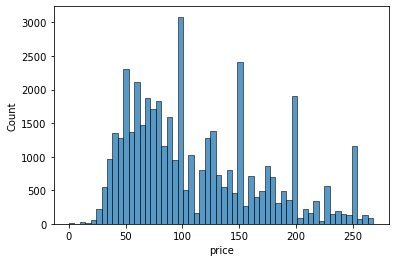

In [66]:
sns.histplot(data=df_airbnb_filtered, x='price')

## BONUS: Tests d'hypothèse

### Exercise 6 – La taille des cerveaux? (***)
Grâce au dataset `brain_size.csv`, répondre à la question: est-ce que la moyenne de la "VIQ size" est significativement différente entre les homme et les femmes? <br>

_Hint: pour selectionner des données par genre il faut slicer la dataframe grâce à une condition (`pandas`)._

Source: https://scipy-lectures.org/packages/statistics/index.html

In [67]:
import pandas as pd 
data = pd.read_csv('brain_size.csv', sep=';', index_col=0)
data

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545
6,Female,99,90,110,146,69.0,928799
7,Female,138,136,131,138,64.5,991305
8,Female,92,90,98,175,66.0,854258
9,Male,89,93,84,134,66.3,904858
10,Male,133,114,147,172,68.8,955466


In [68]:
data['Gender'] == 'Male'

1     False
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9      True
10     True
11    False
12     True
13     True
14    False
15    False
16    False
17    False
18     True
19    False
20     True
21     True
22     True
23    False
24     True
25    False
26     True
27    False
28     True
29    False
30    False
31    False
32     True
33     True
34     True
35    False
36    False
37     True
38    False
39     True
40     True
Name: Gender, dtype: bool

In [69]:
data[ data['Gender'] == 'Male' ]['VIQ']

2     150
3     123
4     129
9      93
10    114
12    150
13    129
18     96
20     77
21     83
22    107
24    145
26    145
28     96
32    145
33     96
34     96
37    150
39     90
40     91
Name: VIQ, dtype: int64

In [70]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']

In [71]:
from scipy import stats

my_test = stats.ttest_ind(female_viq, male_viq)
print(my_test.pvalue)

0.44452876778583217


In [72]:
data.shape

(40, 7)